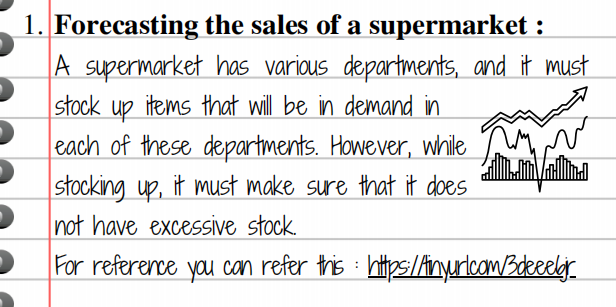

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive


drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/forcasting sales.csv')
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:

print(data.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [ ]:

print(data.shape)


(9800, 18)


In [ ]:

print(data.describe())


            Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000


In [ ]:

print(data.dtypes)


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


In [ ]:

print(data.isnull().sum())


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [ ]:

# Convert object columns to integers
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.date
data['Order Date'] = data['Order Date'].apply(lambda x: x.toordinal())


<ipython-input-39-a7dba5d01a87>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Order Date'] = pd.to_datetime(data['Order Date']).dt.date


In [ ]:
# Encode categorical features
encoder = LabelEncoder()
data['Product Name'] = encoder.fit_transform(data['Product Name'])
data['Category'] = encoder.fit_transform(data['Category'])
data['Sub-Category'] = encoder.fit_transform(data['Sub-Category'])


## **Forecast the demand for the next 7 days (per next week)**

In [ ]:
departments = data['Category'].unique()

for department in departments:
    department_data = data[data['Category'] == department]
    department_data = department_data.set_index('Order Date')
    department_data = department_data.resample('D')['Sales'].sum()
    train_data = department_data.iloc[:-7]  #  last 7 days
    test_data = department_data.iloc[-7:]  # last 7 days
    model = SARIMAX(train_data, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))
    fitted_model = model.fit()
    forecast = fitted_model.get_forecast(steps=7)
    forecasted_demand = forecast.predicted_mean
    optimal_stock = np.max(forecasted_demand)
    print("Department:", department)
    print("Optimal Stocking Quantity:", optimal_stock)
    print("----------------------------------------------")


Department: Furniture
Optimal Stocking Quantity: 74.78607092141509
----------------------------------------------
Department: Office Supplies
Optimal Stocking Quantity: 330.5689698221293
----------------------------------------------
Department: Technology
Optimal Stocking Quantity: 86.66127025323242
----------------------------------------------


# **Forecast the demand for the next 30 days (per next month)**

In [ ]:
departments = data['Category'].unique()

for department in departments:
    department_data = data[data['Category'] == department]
    department_data = department_data.set_index('Order Date')
    department_data = department_data.resample('D')['Sales'].sum()
    train_data = department_data.iloc[:-30]   #  last 30 days
    test_data = department_data.iloc[-30:]     #  last 30 days
    model = SARIMAX(train_data, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))
    fitted_model = model.fit()
    forecast = fitted_model.get_forecast(steps=30)
    forecasted_demand = forecast.predicted_mean
    optimal_stock = np.max(forecasted_demand)
    print("Department:", department)
    print("Optimal Stocking Quantity:", optimal_stock)
    print("----------------------------------------------")


Department: Furniture
Optimal Stocking Quantity: 1123.070510573593
----------------------------------------------
Department: Office Supplies
Optimal Stocking Quantity: 398.5837076812834
----------------------------------------------
Department: Technology
Optimal Stocking Quantity: 191.5599471363844
----------------------------------------------


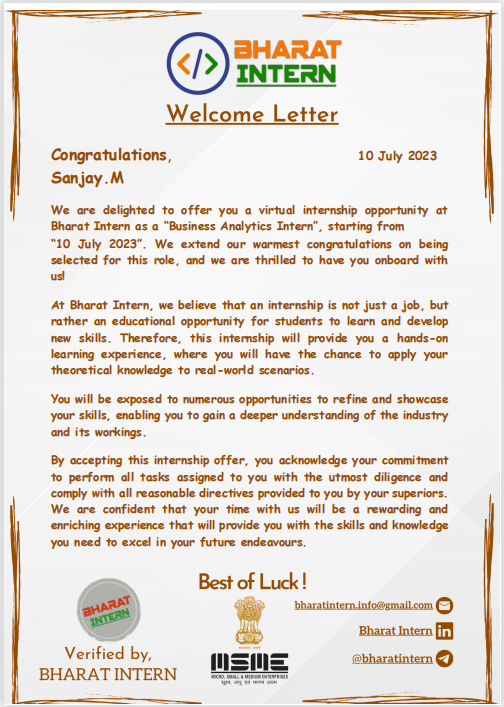